In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#read file
sales_byy=pd.read_csv('Coffee_company.csv', index_col=0)

In [3]:
#check columns
sales_byy.columns

Index(['Country', ' Product ', ' Discount Band ', 'Units Sold',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [4]:
#clean data
sales_byy.columns=sales_byy.columns.str.replace(' ', '')

In [ ]:
#check
sales_byy.head()

,Country,Product,DiscountBand,UnitsSold,ManufacturingPrice,SalePrice,GrossSales,Discounts,Sales,COGS,Profit,Date,MonthNumber,MonthName,Year
Segment,,,,,,,,,,,,,,,
Beverages,United States of America,Robusta,None,2427.75,$3.90,$26.00,"$42,081.00",$-,"$42,081.00","$21,040.50","$16,185.00",01/01/2021,1,January,2021
Beverages,Switzerland,Robusta,None,1981.50,$3.90,$26.00,"$34,346.00",$-,"$34,346.00","$17,173.00","$13,210.00",01/01/2021,1,January,2021
Snacks,Japan,Robusta,None,3267.00,$3.90,$19.50,"$42,471.00",$-,"$42,471.00","$28,314.00","$10,890.00",01/06/2021,6,June,2021
Snacks,Switzerland,Robusta,None,1332.00,$3.90,$19.50,"$17,316.00",$-,"$17,316.00","$11,544.00","$4,440.00",01/06/2021,6,June,2021
Snacks,Belgium,Robusta,None,3705.00,$3.90,$19.50,"$48,165.00",$-,"$48,165.00","$32,110.00","$12,350.00",01/06/2021,6,June,2021


In [5]:
#check the sales column and date column data type
print(sales_byy['Sales'].dtype, sales_byy['Date'].dtype)

object object


In [6]:
#additional cleaning
sales_byy['Sales']=sales_byy['Sales'].str.replace('$','').str.replace(',','')

In [7]:
#change it to numeric
sales_byy['Sales']=pd.to_numeric(sales_byy['Sales'], errors='coerce')
#check data
sales_byy['Sales'].head()

Segment
Beverages    42081.0
Beverages    34346.0
Snacks       42471.0
Snacks       17316.0
Snacks       48165.0
Name: Sales, dtype: float64

In [8]:
#clean and format the date
#clean the data, replace the / with -
sales_byy['Date']=sales_byy['Date'].str.replace('/', '-')
sales_byy['Date']=pd.to_datetime(sales_byy['Date'], format='%d-%m-%Y')
#check the data
sales_byy['Date'].head()

Segment
Beverages   2021-01-01
Beverages   2021-01-01
Snacks      2021-06-01
Snacks      2021-06-01
Snacks      2021-06-01
Name: Date, dtype: datetime64[ns]

In [9]:
#transform the date to quarters
sales_byy['Date']=sales_byy['Date'].dt.to_period('Q')

In [10]:
#group the sales by date and sum them up
g_y=sales_byy.groupby('Date')['Sales'].sum()
g_y.head()

Date
2021Q1    25339798.91
2021Q2    29502044.05
2021Q3    26476111.84
2021Q4    38686468.77
2022Q1    17737859.24
Freq: Q-DEC, Name: Sales, dtype: float64

<Axes: title={'center': 'Sales for the Period 2021-2023'}, xlabel='Quarters', ylabel='Sales in 10s of $ Millions'>

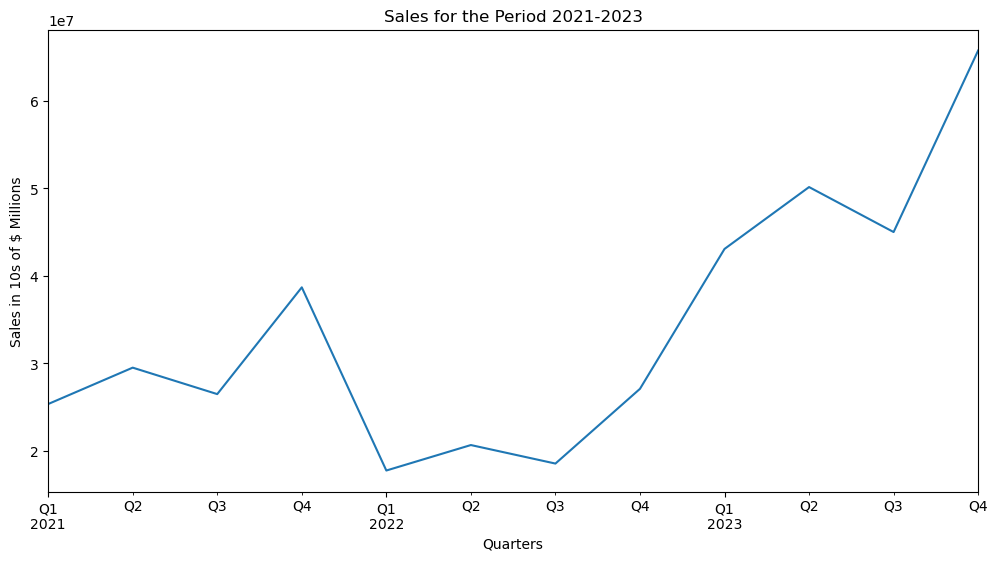

In [13]:
#plot the data, specify the title, xaxis, y, and figsize
g_y.plot(xlabel='Quarters', ylabel='Sales in 10s of $ Millions', title='Sales for the Period 2021-2023', figsize=(12, 6))

## Price effectiveness on sales per segment

In [15]:
#explore the relationship between the sales price and sales
#I want to plot them and run a regression 
#1 clean the data in the saleprice column
sales_byy['SalePrice']=sales_byy['SalePrice'].str.replace('$','')
#change it to numeric
sales_byy['SalePrice']=pd.to_numeric(sales_byy['SalePrice'], errors='coerce')
#check the data
sales_byy['SalePrice'].head()

Segment
Beverages    26.0
Beverages    26.0
Snacks       19.5
Snacks       19.5
Snacks       19.5
Name: SalePrice, dtype: float64

In [16]:
#dtype is object, we can use this to regress with the sales
#make another data frame with sales and saleprice data
salestoprice=sales_byy[['SalePrice', 'Sales']].copy().sort_values('SalePrice')
salestoprice.head()

,SalePrice,Sales
Segment,,
Beverages,6.37,1506.12
Beverages,6.37,17036.18
Beverages,6.37,13701.62
Beverages,6.37,13701.62
Beverages,6.37,17036.18


In [21]:
sales_price=salestoprice.reset_index()
sales_price.head()

,Segment,SalePrice,Sales
0,Beverages,6.37,1506.12
1,Beverages,6.37,17036.18
2,Beverages,6.37,13701.62
3,Beverages,6.37,13701.62
4,Beverages,6.37,17036.18


In [25]:
#groupby segment
sales_price=salestoprice.groupby(['Segment', 'SalePrice'])['Sales'].sum().reset_index()
sales_price.tail()

,Segment,SalePrice,Sales
16,Packaged and Prepared Foods,162.50,20230771.62
17,Packaged and Prepared Foods,276.25,34392311.50
18,Snacks,13.65,1670432.05
19,Snacks,19.50,2386331.60
20,Snacks,33.15,4056763.56


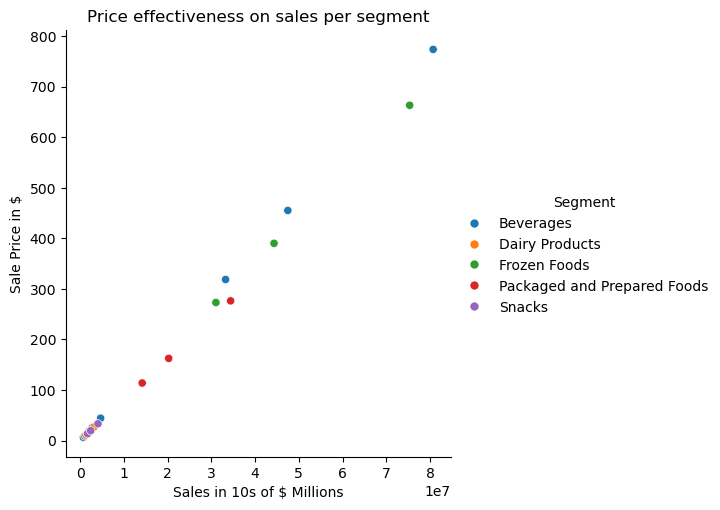

In [27]:
#plot the data
rel=sns.relplot(data=sales_price, x='Sales', y='SalePrice', hue='Segment')
rel.set(title='Price effectiveness on sales per segment', xlabel='Sales in 10s of $ Millions', ylabel='Sale Price in $')